In [1]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
from print_dict import pd as printd
%matplotlib inline
#%matplotlib widget
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

# "Pure Goodwin"

The following fields are defined in the model but not it the library :
	- statevar: ['Idelta']
	- parameter: ['apond', 'wpond']
The following fields are identified as parameters :
	- independant : ['delta', 'z', 'u', 'nu', 'Cpond', 'philinConst', 'philinSlope']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['V', 'time']
	 - state variable : ['dotV', 'pi', 'omega', 'd']
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['w', 'a', 'Y', 'L', 'Pi', 'Idelta', 'I', 'Ir', 'MtransactY', 'MtransactI', 'employment', 'employmentAGG', 'Phillips', 'W', 'pi', 'omega', 'd', 'C', 'dotV', 'dotD']
	- differential: ['D', 'Dh', 'V', 'K', 'w0', 'p', 'a0', 'N', 'time']

Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'gammai', 'r', 'philinConst', 'philinSlope', 'Xi', 'Gamma', 'Cpond', 'V']
Changes Ignored:['eta', 'mu0', 'c

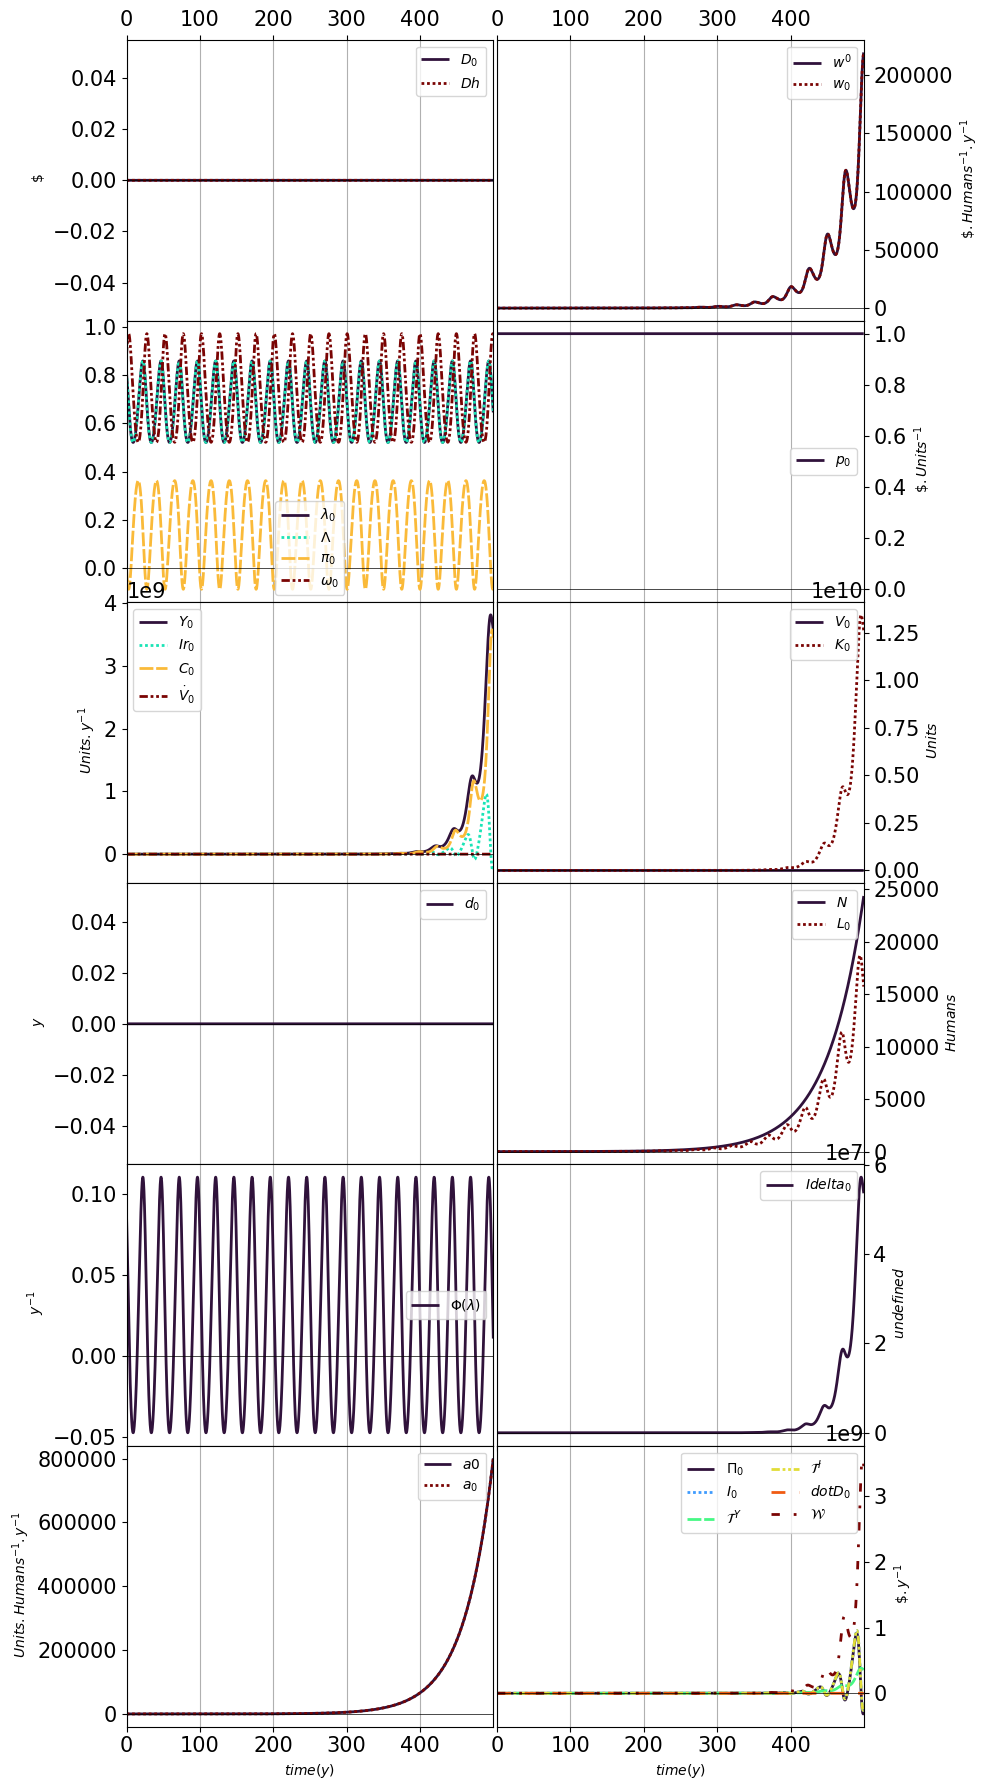

In [39]:
hub0=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub0.supplements['generateNgoodwin'](1) 

hubG=pgm.Hub('MultiGoodwin')
hubG.set_dparam(**dparam0)
hubG.set_dparam('Tmax',500)
hubG.set_dparam('Cpond',1)
hubG.get_summary()
hubG.run()
hubG.plot()

## 1 Sector at equilibrium 

In [59]:
hub0=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub0.supplements['generateNgoodwin'](1,gamma=.3) 

dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub0.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth
K= hub0.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N


#dparam0['w0']=.62
# OUT OF EQUILIBRIUM
#dparam0['K']*=1.1
#dparam0['p']*=1.1

print(dparam0['w0'])

"""
hubG=pgm.Hub('MultiGoodwin')
hubG.set_dparam(**dparam0)
#hubG.set_dparam('Tmax',500)
#hubG.set_dparam('Cpond',1)
hubG.get_summary()
hubG.run()
#hubG.plot()
"""

0.75
0.75
0.75
0.5499999999999999
[0.55]


"\nhubG=pgm.Hub('MultiGoodwin')\nhubG.set_dparam(**dparam0)\n#hubG.set_dparam('Tmax',500)\n#hubG.set_dparam('Cpond',1)\nhubG.get_summary()\nhubG.run()\n#hubG.plot()\n"

## N sector synchronized

The following fields are defined in the model but not it the library :
	- statevar: ['Idelta']
	- parameter: ['apond', 'wpond']
The following fields are identified as parameters :
	- independant : ['delta', 'z', 'u', 'nu', 'Cpond', 'philinConst', 'philinSlope']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['V', 'time']
	 - state variable : ['dotV', 'pi', 'omega', 'd']
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['w', 'a', 'Y', 'L', 'Pi', 'Idelta', 'I', 'Ir', 'MtransactY', 'MtransactI', 'employment', 'employmentAGG', 'Phillips', 'W', 'pi', 'omega', 'd', 'C', 'dotV', 'dotD']
	- differential: ['D', 'Dh', 'V', 'K', 'w0', 'p', 'a0', 'N', 'time']

Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'gammai', 'r', 'philinConst', 'philinSlope', 'Xi', 'Gamma', 'Cpond', 'V']
Changes Ignored:['eta', 'mu0', 'c

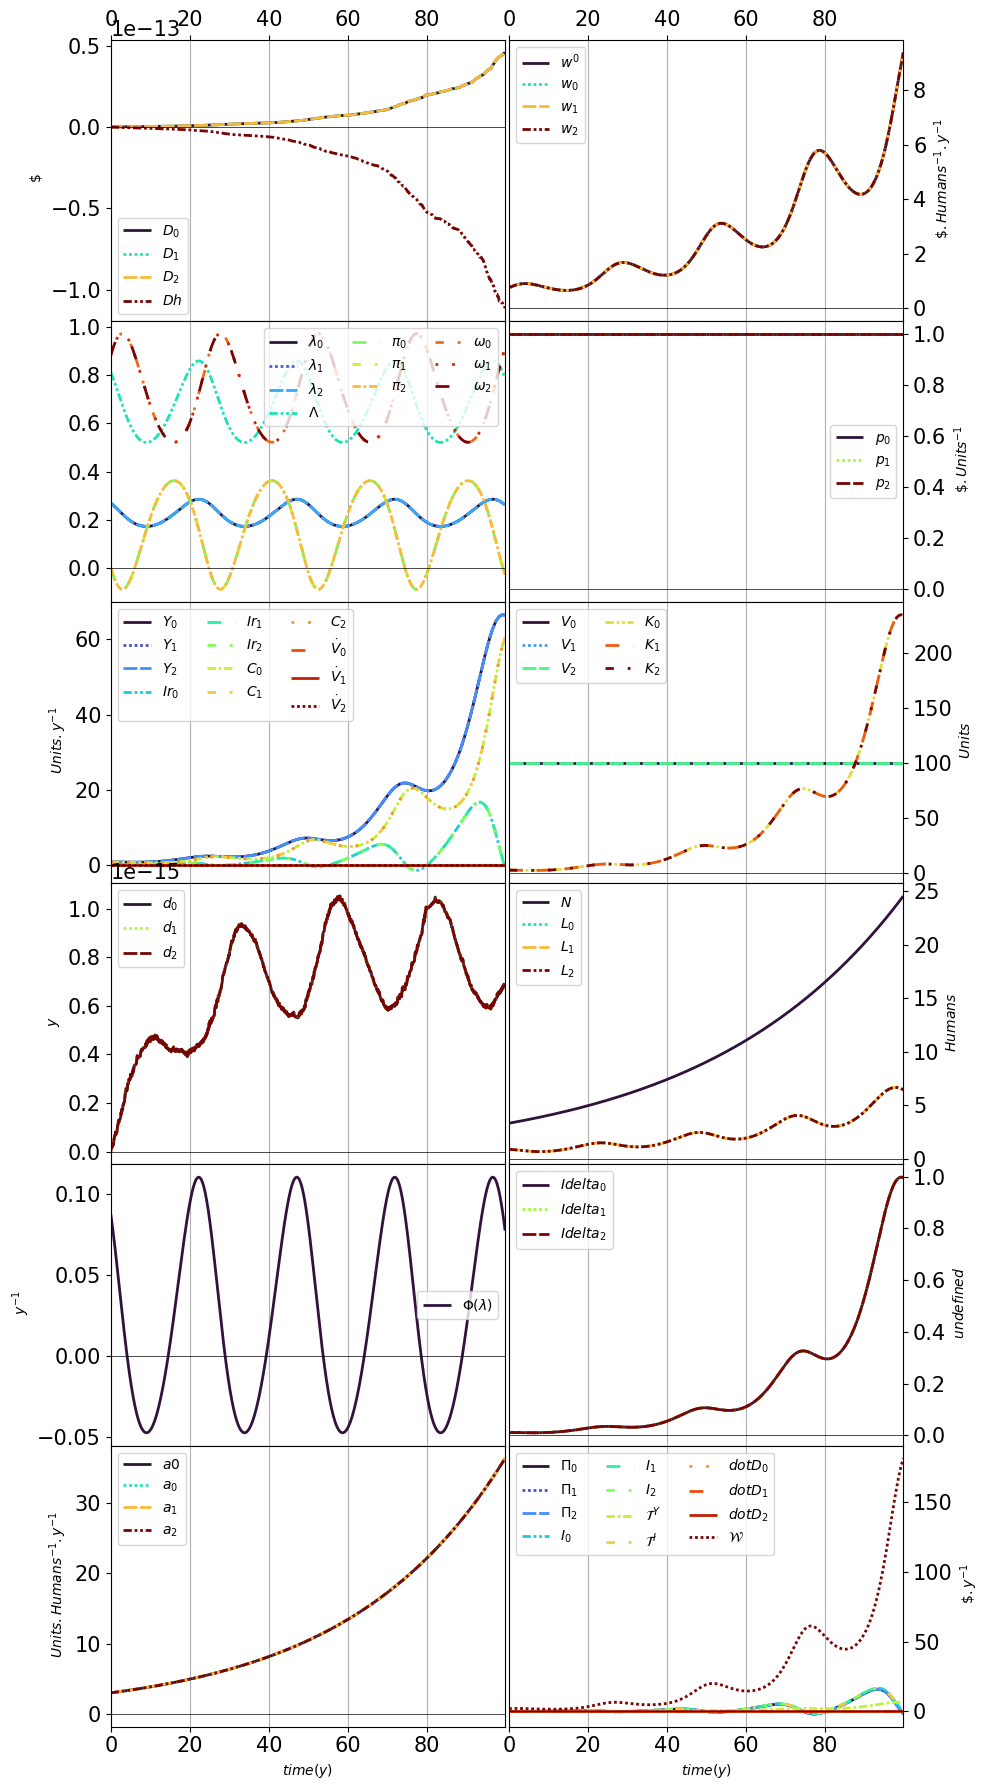

In [34]:
hub0=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub0.supplements['generateNgoodwin'](3) 

hubG=pgm.Hub('MultiGoodwin')
hubG.set_dparam(**dparam0)
#hubG.set_dparam('Tmax',500)
#hubG.set_dparam('Cpond',1)
#hubG.get_summary()
hubG.run()
hubG.plot()

In [68]:
hub=pgm.Hub('PuttyClay')

The following fields are defined in the model but not it the library :
	- size: ['Ntechno']
	- statevar: ['Iweight']
	- parameter: ['apond']
The following fields are identified as parameters :
	- independant : ['delta', 'gammai', 'ibasket', 'z', 'A', 'philinConst', 'philinSlope', 'Gamma', 'gamma']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['w', 'a', 'nu', 'Y', 'L', 'omega', 'Pi', 'pi', 'ROC', 'Iweight', 'Ir', 'employment', 'employmentAGG', 'Phillips']
	- differential: ['K', 'a0', 'w0', 'N', 'p', 'time']


In [77]:
hub.set_dparam('w0',.67)
hub.set_dparam('Ntechno',3)
hub.set_dparam('N',3)



Changing Fields: ['w0']
Identified w0 as a value change on all axes

Changes Ignored:['Ntechno']

Changing Fields: ['N']
Identified N as a value change on all axes


In [78]:
hub.get_summary()

############################################################
####################      SUMMARY       ####################
############################################################
Model       : PuttyClay
Multiple types of capital
File        : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Components\_model_PuttyClay.py
####################       Fields       ####################
statevar        014 ['w', 'a', 'nu', 'Y', 'L', 'omega', 'Pi', 'pi', 'ROC', 'Iweight', 'Ir', 'employment', 'employmentAGG', 'Phillips']
differential    006 ['K', 'a0', 'w0', 'N', 'p', 'time']
parameters      023 ['delta', 'gammai', 'ibasket', 'z', 'A', 'philinConst', 'philinSlope', 'Gamma', 'gamma', 'Ntechno', 'beta', 'apond', 'phinull', 'alpha', 'W', 'n', 'Nprod']
####################      Presets       ####################
####################       Flags        ####################
run            : False
cycles         : False
derivative     : False
multisectoral  : True
solver         : None
#######

In [79]:
hub.run()


time step 1000 / 1000


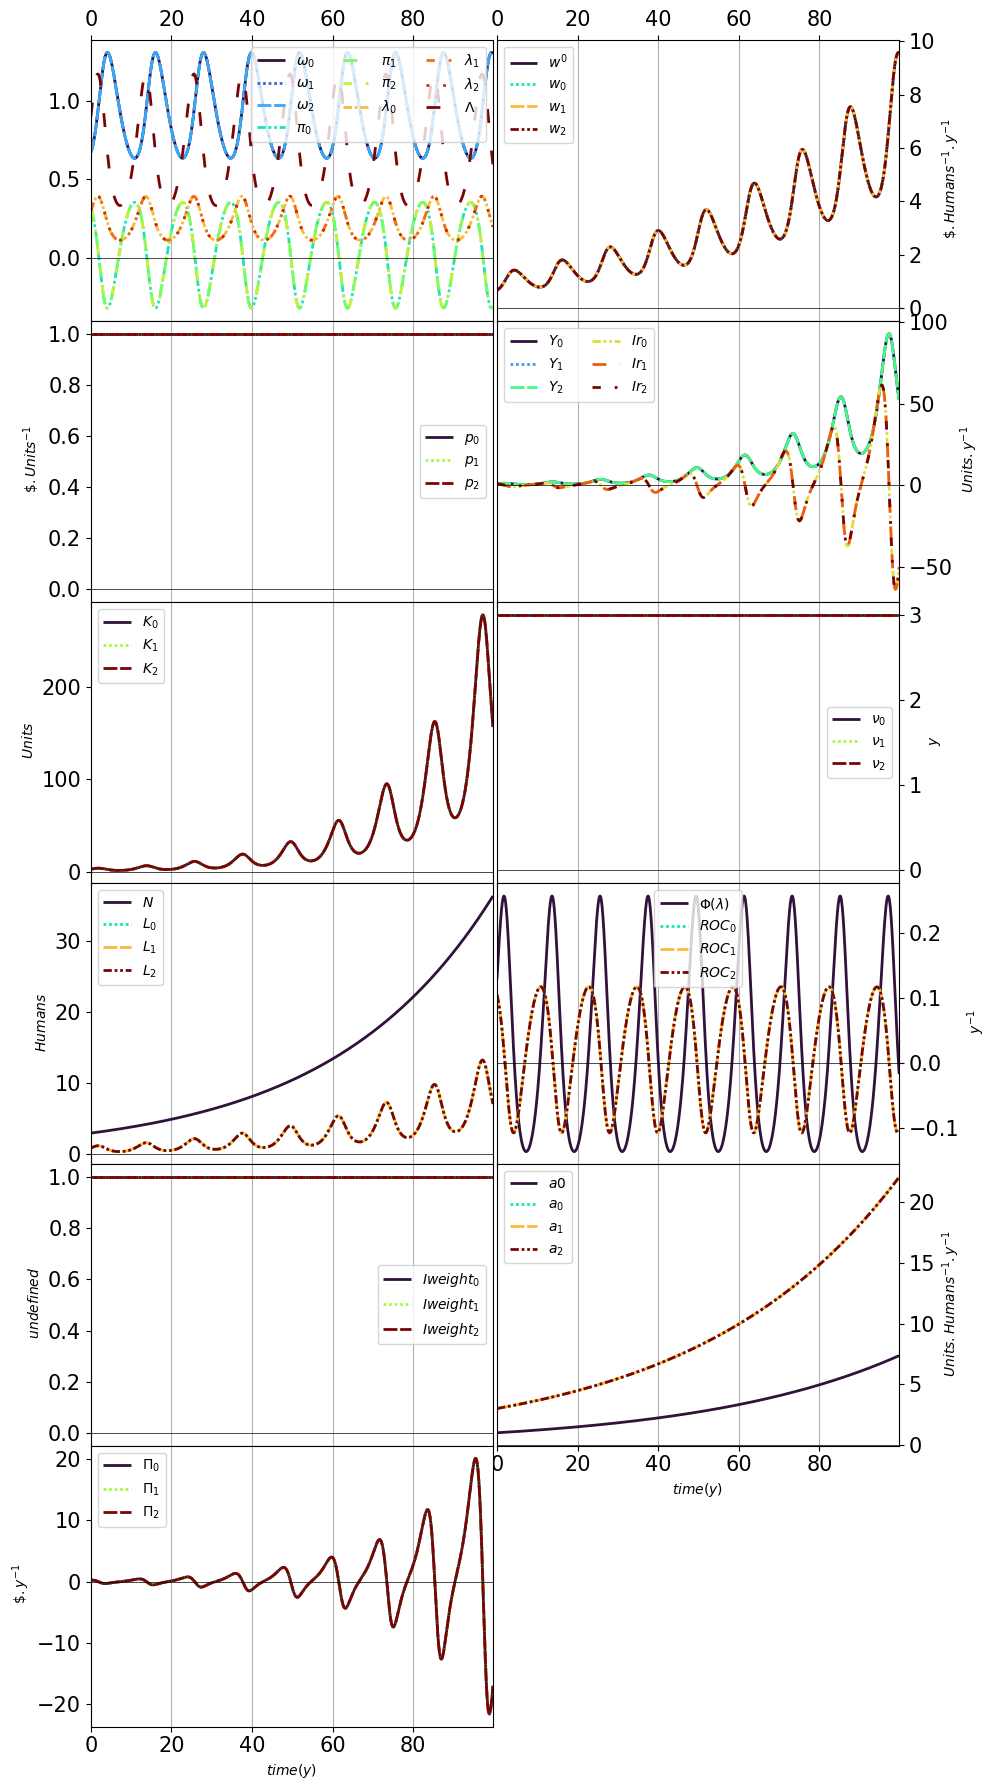

In [80]:
hub.plot()